# Assignment 2_3
## Bad Apple challenge Evaluation and Analysis

  This assignment evaluates the performance of the image based navigation (bad apple challenge) 
  by taking into consideration some appropraite direct and indirect
  measures. First, it analyses relevance of the retrieved diseases which are ranked based on a score
      computed from user feedback in terms of Mean-Average-Precision(MAP). Here the metric used was MAP percision(1/position of target disease in the list of retrieved disease) instead of 
  precision (which would be 1/length of the retrieved diseases) because it is more informative in ranked retrieval systems. In addition success percentage per disease was also evaluated. The csv file contains some annomalities which were ignored during analysis. For example, as the cutoff score for retrieved diseases should be greater than zero there are some rows with success . Recall is not a good measure in this case because the relevant disease is only one and therefore it would be either one if it is retrieved(score > 0 in final_rank) or zero otherwise. 
### <p> In summary, tasks of this assignment were implemented as follows:</p>
<ul>
<li> For the first task Mean-Average-Precision for each session was computed. Here the cutoff score was considered to be strictly greater than zero.After that the 
    average of MAP for sessions with the same target diseases was calculated. Then this information was plotted(figure1) for comparison. Explanation of the analysis are in the cell below the figure.</li>
<li> Success percentage for each target disease of in a session was calculated. That is,the number of success = True divided by total sessions of the same disease. This is shown in the second plot(histogram figure2).</li>
<li> For Task 2 (assignment 3) firstly, MAP average and success rate for each round were computed and then plotted as shown in the third and fourth figures.  </li>
<li> Secondly, To understand the impact of user interface on postive and negative feedback prediction of the shown images for each round was analysed. These analysis were done only for the sessions where all images shown are classiffied as either positive or negative(green or red selection in the web interaction).Explanations of the analysis is under figure5</li>
<li> Sensitivity and Specifity  on feedback for each round was analysed (as shown in figure6) to evaluate the measure oh how accurately positives are correctly identified as positives and similarly also how true negatives are  identified as such. Then this is followed by precision(true postive proportion among the retrieved) and recall(sensitivity) as discussed under figure7.</li>
<li> Then, informedness and markedness  feedback is Discussed under the graph 9,10,11</li>
<li> At last but not least,time elapsed in each round and their relation to succes is evaluated and explained under figure8</li>
<li> In the last cell a code to print annomalities found on the file (but ignored in the analysis of this assignment) is implemented</li>
</ul>  
 ### important to note here is that the input csv file should be in the same working directory of the code when executed.

Overall MAP average= 0.4783950617283951


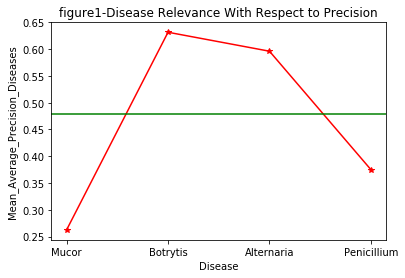

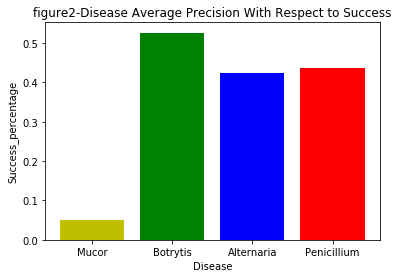

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df =  pd.read_csv('ChallengeData_10-31.csv',delimiter=';')
###
###data cleaning
###
df.final_rank=df.final_rank.apply(lambda x: eval(x))
df.positive_feed=df.positive_feed.apply(lambda x: eval(x))
df.true_positive=df.true_positive.apply(lambda x: eval(x))
df.negative_feed=df.negative_feed.apply(lambda x: eval(x))
df.true_negative=df.true_negative.apply(lambda x: eval(x))

#
#  MAP Computation
#  
df['MAP']=0.0
for i in range(0,len(df.final_rank)): 
    tp=0.0
    n=0
    for t in df.final_rank[i]:
        if t[0]==df.target_disease[i] and t[1]>0:
            tp=1.0
            n+=1
            df.MAP[i]=tp/n
            break
        elif t[1]<0:
            break
        else:
            n+=1
        
disease=np.array(['Mucor','Botrytis','Alternaria','Penicillium'])
mucor = df.target_disease=='Mucor'
botrytis = df.target_disease=='Botrytis'
alternaria= df.target_disease=='Alternaria'
penicillium = df.target_disease=='Penicillium'

map_mucor = np.mean(df.MAP[mucor])
map_botrytis = np.mean(df.MAP[botrytis])
map_alternaria = np.mean(df.MAP[alternaria])
map_penicillium = np.mean(df.MAP[penicillium])
mapavg=np.mean(df.MAP)
print("Overall MAP average=",mapavg)
plt.title('figure1-Disease Relevance With Respect to Precision')
plt.plot(disease,[map_mucor,map_botrytis,map_alternaria,map_penicillium],'*r-')
plt.axhline(y=mapavg, color='g', linestyle='-')
plt.xlabel('Disease')
plt.ylabel('Mean_Average_Precision_Diseases')
plt.show()

mucurT = np.count_nonzero(df.success[mucor])/len(df.success[mucor])
botrytisT =np.count_nonzero(df.success[botrytis])/len(df.success[botrytis])
alternariaT = np.count_nonzero(df.success[alternaria])/len(df.success[alternaria])
penicilliumT=np.count_nonzero(df.success[penicillium])/len(df.success[penicillium])

x = np.arange(4)
colors = ['y','g', 'b', 'r']
plt.title('figure2-Disease Average Precision With Respect to Success')
plt.bar(x,height=[mucurT,botrytisT,alternariaT,penicilliumT],color=colors)
plt.xticks(x,disease)
plt.xlabel('Disease')
plt.ylabel('Success_percentage')
plt.show()

### Precision and Success Rate Comparison of the diseases
The above figures illustrate the mean-average-precision and success percentage of the four target diseases.The overall MAP precision average as printed above is about 0.48. It is clear that precision and success are not symetric among the diseases. For this sample of 81 sessions, the smallest precision average and success precision was for the Mucor disease with scored values of around 0.26 and 0.05 respectively and the largest values were about 0.64 and 0.51 for the disease Botrytis. The diseases Alternaria scored slightly smaller than Botrytis with values of precision = 0.6 and a similar score in success rate of 0.41.
# Assignment_3
## Task2
  Below are the code and figures of the second part of this assignment. Firstly, considering all the 81 sample     sessions for each of the three rounds are compared according to MAP and success proportion as the previous task. Only 37 out 81 session had 100% (positive and negative)feedback classification of the shown images, so further measures were implemented on these sessions.

Overall,avg MAP precision= 0.4783950617283951


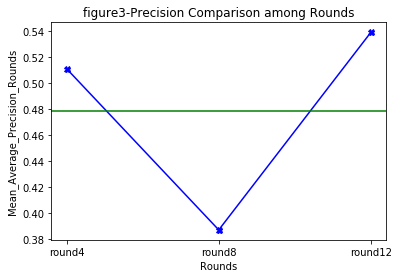

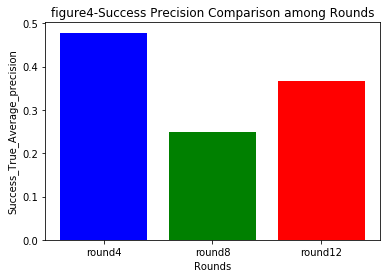

In [2]:
round4 = df.round_images == 4
round8 = df.round_images == 8
round12 = df.round_images == 12

map4=np.mean(df.MAP[round4])
map8=np.mean(df.MAP[round8])
map12=np.mean(df.MAP[round12])

round4T = np.count_nonzero(df.success[round4])/len(df.success[round4])
round8T = np.count_nonzero(df.success[round8])/len(df.success[round8])
round12T =np.count_nonzero(df.success[round12])/len(df.success[round12])
print("Overall,avg MAP precision=",mapavg)
rounds = np.array(['round4','round8','round12'])
plt.title('figure3-Precision Comparison among Rounds')
plt.plot(rounds,[map4,map8,map12],'Xb-')
plt.axhline(y=mapavg, color='g', linestyle='-')
plt.xlabel('Rounds')
plt.ylabel('Mean_Average_Precision_Rounds')
plt.show()

y = np.arange(3)
plt.title('figure4-Success Precision Comparison among Rounds')
plt.bar(rounds,height=[round4T,round8T,round12T],color=['b','g','r'])
plt.xlabel('Rounds')
plt.ylabel('Success_True_Average_precision')
plt.show()

## MAP and Success Rate
 In the above figure it is clear that the three rounds(round4,round8,round12) had similar values between a minimum of 0.39 for round8, 0.51 for round4 and a maximum of 0.54 for round12. Similarly, for success percentage it is ovserved that round4 is approximatly 0.48 then about 0.35 for round12 and a minimum of 0.25 for round8.
 So based on MAP precision round12 performance was greater than that of round4 by a small margin, whereas success proportion performance for round4 interface was the best. Round8 interface performance was the worst of all. 
## Other dependent variables used
 In addition to the measures computed above (MAP and success rate) positive and negative feedbacks, average elapsed time in each session grouped by interface round were taken in to consideration to evaluate some statistical proxy measures. First the sessions in which all the shown images are classified as relevant or irrelevant were filtered. This is mainly due to the fact that to calculate all the proxy measures, it is important to know the true positives, true negative, false positives and false negatives. Then these rows were examined for some statistical analysis. The proxy measures computed to compute performance of the system are Positive and Negative Prediction Values(ppv,npv),Sensitivity(recall),Specifity,Informedness and Markedness.  Each case is analysed and commented below.

In [3]:
##
##Compute rows with 100% feedback
##
x=[]
for i in range(0,len(df.shown_images)):
    b = len(eval(df.shown_images[i]))-len(df.positive_feed[i])-len(df.negative_feed[i])
    x.append(b==0)
df_complete = df[x]
round4c = df_complete.round_images == 4
round8c = df_complete.round_images == 8
round12c = df_complete.round_images == 12
#print(len(df_complete),'rows gave 100% feedback')

df_complete['sensitivity']=0.0
df_complete['specificity']=0.0
df_complete['ppv'] =0.0
df_complete['npv'] =0.0
df_complete['BM']= 0.0
df_complete['MK']=0.0

for i in df_complete.final_rank.index:
    tp = len(df_complete.true_positive[i])
    fn = len(df_complete.negative_feed[i])-len(df_complete.true_negative[i])
    tn = len(df_complete.true_negative[i])
    fp = len(df_complete.positive_feed[i])-len(df_complete.true_positive[i])
    if tp != 0:
        df_complete.sensitivity[i] =tp/(tp+fn)
        df_complete.ppv[i]=tp/(tp+fp)
    if tn != 0:
        df_complete.specificity[i] =tn/(tn+fp)
        df_complete.npv[i] = tn/(tn+fn)
    df_complete.MK[i]=df_complete.ppv[i]+df_complete.npv[i]-1
    df_complete.BM[i]=df_complete.sensitivity[i]+df_complete.specificity[i]-1

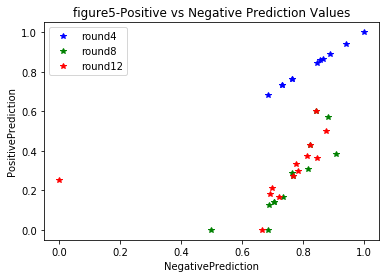

In [4]:
resultpnpv=df_complete.sort_values('npv')
plt.title('figure5-Positive vs Negative Prediction Values')
plt.xlabel('NegativePrediction')
plt.ylabel('PositivePrediction')
plt.plot(resultpnpv.npv[round4c],resultpnpv.npv[round4c],'*b')
plt.plot(resultpnpv.npv[round8c],resultpnpv.ppv[round8c],'*g')
plt.plot(resultpnpv.npv[round12c],resultpnpv.ppv[round12c],'*r')
plt.legend(rounds,loc=2)
plt.show()

## PPV vs NPV
From the scatter plot above it is observed that round4 had ppv and npv values above 0.68 which is the best score. Round8 and Round12 had similar values both less than 0.6 but on average round12 was slightly better. This implies that sessions with round 4 were the best in both positive and negative prediction where as there was just little difference among rounds 8 and 12.

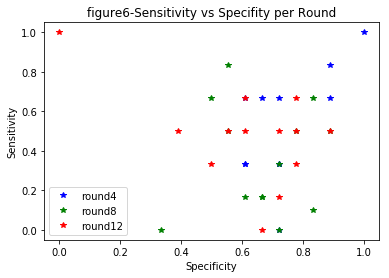

In [5]:
result=df_complete.sort_values('specificity')

plt.title('figure6-Sensitivity vs Specifity per Round')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.plot(result.specificity[round4c],result.sensitivity[round4c],'*b')
plt.plot(result.specificity[round8c],result.sensitivity[round8c],'*g')
plt.plot(result.specificity[round12c],result.sensitivity[round12c],'*r')
plt.legend(rounds)
plt.show()

 ## Specifity vs Sensitivity
  The above scatter plot shows how sensitivity and specifity vary in the different rounds. All three rounds had relatively high Specificity which is on average about 0.75. This implies that the difference in the round interface didn't impact much in the users negative prediction of the shown images. In the contrary only round 4 interface was the best performant in identifying the right positives with hitrate of more than 0.70 on average then followed by round8 and round12 with a score slightly more than 0.4 and approximatly 0.37 respectively.An outlier point with sensitivity equal to 1 and Specifity equal to zero was also observed for round12. 

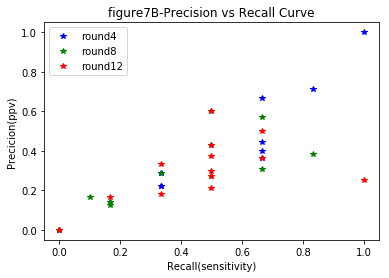

In [6]:
resultpnpv=df_complete.sort_values('sensitivity')
plt.title('figure7B-Precision vs Recall Curve')
plt.xlabel('Recall(sensitivity)')
plt.ylabel('Precicion(ppv)')
plt.plot(result.sensitivity[round4c],result.ppv[round4c],'*b')
plt.plot(result.sensitivity[round8c],result.ppv[round8c],'*g')
plt.plot(result.sensitivity[round12c],result.ppv[round12c],'*r')
plt.legend(rounds)
plt.show()

### Recall(Sensitivity) vs Precision (Positive Predictive Value)
It's challenging to interprete the first plot  figure7 as the R-P curves for each round cross each other several times. However the blue curve for round4 has a higher performance level since it is above both the green(round8) and red(round12)curves. The curve for round4 as shown on the figure moreover illustrates linear behavior, which is uncommon. Usually in information retrieval systems precision diminishes with growing recall but here it is not the case . This might also due to the fact that the number of samples which are considered here are too few to reveal the usual behavior. Figure7B is just a scatter plot of figure7A implemented to make note of the points which were connected to construct the Precision Recall diagram. All the different round interfaces from the above diagram and based on their performance both in precision and recall are ranked in order of round4,round12 and at last round8.

Overall Informedness Average round4 8 12 = 0.11981981981981978
Overall Markedness Average round4 8 12 = 0.08758290097299383
Overall Informedness Average round4 = 0.2727272727272727
Overall Markedness Average round4 = 0.24411126291227606
Overall Informedness Average round8 = 0.020512820512820475
Overall Markedness Average round8 = 0.01969973445622409
Overall Informedness Average round12 = 0.08974358974358973
Overall Markedness Average round12 = 0.0230189920026786


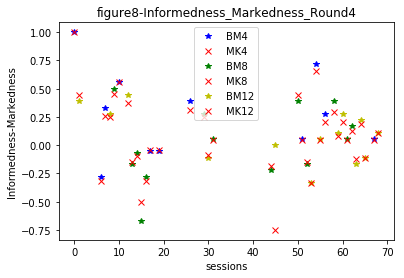

In [7]:
retval = df_complete.sort_values('BM')
print("Overall Informedness Average round4 8 12 =",np.mean(retval.BM))
print("Overall Markedness Average round4 8 12 =",np.mean(retval.MK))
print("Overall Informedness Average round4 =",np.mean(retval.BM[round4c]))
print("Overall Markedness Average round4 =",np.mean(retval.MK[round4c]))
print("Overall Informedness Average round8 =",np.mean(retval.BM[round8c]))
print("Overall Markedness Average round8 =",np.mean(retval.MK[round8c]))
print("Overall Informedness Average round12 =",np.mean(retval.BM[round12c]))
print("Overall Markedness Average round12 =",np.mean(retval.MK[round12c]))
plt.title('figure8-Informedness_Markedness_Round4')
plt.plot(retval.BM[round4c],'*b')
plt.plot(retval.MK[round4c],'xr')
plt.plot(retval.BM[round8c],'*g')
plt.plot(retval.MK[round8c],'xr')
plt.plot(retval.BM[round12c],'*y')
plt.plot(retval.MK[round12c],'xr')
plt.xlabel('sessions')
plt.ylabel('Informedness-Markedness')
plt.legend(['BM4','MK4','BM8','MK8','BM12','MK12'],loc='upper center')
plt.show()

### Informedness and Markedness
Informedness measures how informed the classifiers are with respect to the positive and negative ground truth about the images shown. On the other hand, Markedness measures how trust worthy are both positive and negative predictions.For informedness, positive polarity implies the classifier is informed to correctly identify positives and negatives while negative polarity implies the classifier is informed to incorrectly identify positives and negatives. A value close to zero means
For markedness, positive polarity implies the trust is associated with M’s predictions being correct while negative polarity implies the trust is associated with predictor's predictions being incorrect.
<p></p>
<ul>
<li>Informedness J = Sensitivity + Specificity - 1</li>
<li>Markedness   M = Positive Prediction Value + Negative Prediction Value -1</li>
</ul>

In the figure above there are similar values of informedness and markedness in all sessions( stars * very close to x in the figure). From the average values printed above it's by far clear that round 4 interface performed the best though with a low score of  0.27 and 0.24 of average informedness and markedness.

 avg-time4= 118.96665217391303 
 avg-time8= 169.60003571428572 
 avg-time12= 131.8227333333333
avg-overall= 140.12980707384403


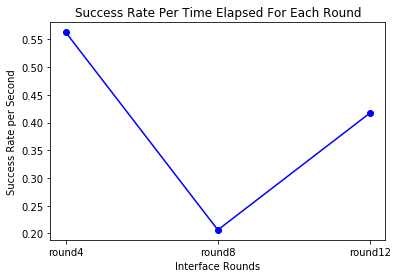

In [8]:
r4=(np.count_nonzero(df.success[round4]==True)/len(df.success[round4]))* (140/np.mean(df.time[round4]))
r8=(np.count_nonzero(df.success[round8]==True)/len(df.success[round8]))*(140/np.mean(df.time[round8]))
r12=(np.count_nonzero(df.success[round12]==True)/len(df.success[round8]))*(140/np.mean(df.time[round12]))
print(" avg-time4=",np.mean(df.time[round4]),"\n avg-time8=",np.mean(df.time[round8]),
      "\n avg-time12=",np.mean(df.time[round12]))
print("avg-overall=",np.mean([np.mean(df.time[round4]),np.mean(df.time[round8]),np.mean(df.time[round12])]))
plt.title('Success Rate Per Time Elapsed For Each Round')
plt.plot(rounds,[r4,r8,r12],'ob-')
plt.xlabel('Interface Rounds')
plt.ylabel('Success Rate per Second')
plt.show()

### Success Rate per Time Elapsed For Each Round
It's clear from the above plot that round4 interface is the best in terms of efficiency which is evaluated as the ratio of successes true per  success true and false divided by the average time elapsed for sessions of the same round. Round12 interface performed slightly worse  whereas round8 had a score significantly low with respect to round4. A coeficient of 140 seconds(the overall mean of time elapsed) was introduced in the formula to make the measurment analysis reasonable 
 

## Below are Anomalies found in the file but ignored during the analysis

In [9]:
for i in range(0,len(df.final_rank)):
    if df.selected_disease[i]==df.target_disease[i] and df.success[i]== False:
        print("Annomaly type1.0 Row",i,"selected=",df.selected_disease[i],"target=",
              df.target_disease[i],"success=",df.success[i])
    if df.selected_disease[i]!=df.target_disease[i] and df.success[i]== True:
        print("Annomaly type1.1 Row",i,"selected=",df.selected_disease[i],"target=",
              df.target_disease[i],"succes=",df.success[i])
    if df.final_rank[i][0][1] <= 0 and df.success[i]==True:
        print("Annomaly type2 Row",i,"No disease was retrieved but success=",df.success[i])

Annomaly type1.1 Row 5 selected= Alternaria target= Penicillium succes= True
Annomaly type2 Row 28 No disease was retrieved but success= True
Annomaly type1.1 Row 74 selected= Botrytis target= Penicillium succes= True
Annomaly type1.0 Row 76 selected= Alternaria target= Alternaria success= False
Annomaly type1.1 Row 77 selected= Botrytis target= Penicillium succes= True
Annomaly type1.0 Row 78 selected= Botrytis target= Botrytis success= False
